In [1]:
import os

In [2]:
!pwd

/home/jovyan/notebooks/analysis/predictive_distribution


In [3]:
import sys
sys.path.append('/home/jovyan/')

In [4]:
from experiments.reporting.report_repository import ReportRepository
from experiments.slack_client import SlackNotifier
from neat.neat_logger import get_neat_logger
from neat.population_engine import EvolutionEngine
from neat.reporting.reports_pyneat import EvolutionReport
from neat.utils import timeit
import math
import random
from itertools import count
import numpy as np

from experiments.logger import logger
from experiments.slack_client import Notifier
from experiments.object_repository.object_repository import ObjectRepository
from experiments.reporting.report_repository import ReportPathFactory
from neat.configuration import get_configuration
from neat.evaluation.evaluation_engine import EvaluationStochasticEngine
from neat.evolution_operators.crossover import Crossover
from neat.evolution_operators.mutation import Mutation
from neat.genome import Genome
from neat.reporting.reports_pyneat import EvolutionReport
from neat.species import SpeciationEngine
from neat.stagnation import Stagnation
from neat.population_engine import PopulationEngine
from neat.utils import timeit
import neat
import tests
from config_files.configuration_utils import create_configuration
from neat.configuration import get_configuration, set_configuration
from neat.evaluation.evaluation_engine import evaluate_genome, get_dataset
from neat.genome import Genome
import os
from neat.loss.vi_loss import get_loss
import torch
import pandas as pd

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve

In [5]:
LOGS_PATH = f'{os.getcwd()}/'
logger = get_neat_logger(path=LOGS_PATH)

In [6]:
PROJECT = 'neuro-evolution'

### Configuration

In [7]:
from neat.analysis.experiment_data import ExperimentDataNE
from neat.analysis.uncertainty.predictive_distribution import PredictionDistributionEstimatorGenome
from neat.analysis.plotting.plot_losses import plot_loss_distribution
from neat.analysis.plotting.plot_pca import plot_dimensionality_reduction
from neat.analysis.plotting.plot_classification_metrics import plot_metrics_by_quantile_several_executions, plot_metrics_by_quantile
from neat.analysis.plotting.plot_prediction_probabilities import plot_prediction_probabilities
from neat.analysis.experiment_predictive_distributions import ExecutionsPredictionDistributions

In [8]:
PROJECT = 'neuro-evolution'
ALGORITHM_VERSION = 'bayes-neat'
DATASET = 'iris'

correlation_ids = [f'neat_ft_10_{DATASET}', f'bayesian_neat_ft_10_{DATASET}'] # Different noise levels with finetuning

In [9]:
# from IPython.core.debugger import set_trace
# set_trace()
experiment_data = ExperimentDataNE(correlation_ids=correlation_ids, dataset_name=DATASET, n_samples=1000,
                                 project=PROJECT, algorithm_version=ALGORITHM_VERSION,
                                keep_top=1.0, filter_normal_finish=True)\
                    .process_data()
data = experiment_data.get_experiment_data()
# data.head()

###########
CORRELATION ID: neat_ft_10_iris
###########
CORRELATION ID: bayesian_neat_ft_10_iris
Fitness of best individual: -0.006231740117073059
Train percentage: 0.75
Random state: 76
Sum Train: 5.300045967102051
Training: 112. Testing: 38
Fitness of best individual: -0.009878262877464294
Train percentage: 0.75
Random state: 4
Sum Train: 26.574954986572266
Training: 112. Testing: 38
Fitness of best individual: -0.4457811415195465
Train percentage: 0.75
Random state: 55
Sum Train: 6.4768218994140625
Training: 112. Testing: 38
Fitness of best individual: -0.2646259367465973
Train percentage: 0.75
Random state: 4
Sum Train: 14.882209777832031
Training: 112. Testing: 38
Fitness of best individual: -0.29803410172462463
Train percentage: 0.75
Random state: 86
Sum Train: 0.16004157066345215
Training: 112. Testing: 38
Fitness of best individual: -0.356799840927124
Train percentage: 0.75
Random state: 11
Sum Train: -4.445039749145508
Training: 112. Testing: 38
Fitness of best individual: -0.

In [10]:
data.shape

(30, 16)

In [11]:
data.head(1)

,correlation_id,execution_id,train_percentage,noise,is_bayesian,beta,loss_training,loss_testing,duration,end_condition,n_parameters,n_nodes,n_connections,mean_genome_std,accuracy,f1
0,neat_ft_10_iris,06923a8b-d7a5-45d8-b015-7102e0a062c4,0.75,0.0,False,0.0,0.006232,0.439869,0:23:00.360574,normal,148,24,50,0.000001,89.473684,0.894737


In [12]:
epd = ExecutionsPredictionDistributions(experiment_data=experiment_data).run(testing=False, filter_no_bayesian=True)

Sum Train: 10.409314155578613
Training: 112. Testing: 38


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Sum Train: 13.032487869262695
Training: 112. Testing: 38


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Sum Train: -8.890926361083984
Training: 112. Testing: 38
Sum Train: -6.405988693237305
Training: 112. Testing: 38
Sum Train: -28.866737365722656
Training: 112. Testing: 38


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Sum Train: -32.15251159667969
Training: 112. Testing: 38


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Sum Train: -3.423335075378418
Training: 112. Testing: 38
Sum Train: -0.34218311309814453
Training: 112. Testing: 38
Sum Train: 8.02547836303711
Training: 112. Testing: 38


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Sum Train: -32.15251159667969
Training: 112. Testing: 38
Sum Train: 9.177571296691895
Training: 112. Testing: 38
Sum Train: 5.419893264770508
Training: 112. Testing: 38


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Sum Train: -6.6297197341918945
Training: 112. Testing: 38
Sum Train: -19.378149032592773
Training: 112. Testing: 38
Sum Train: -9.167516708374023
Training: 112. Testing: 38


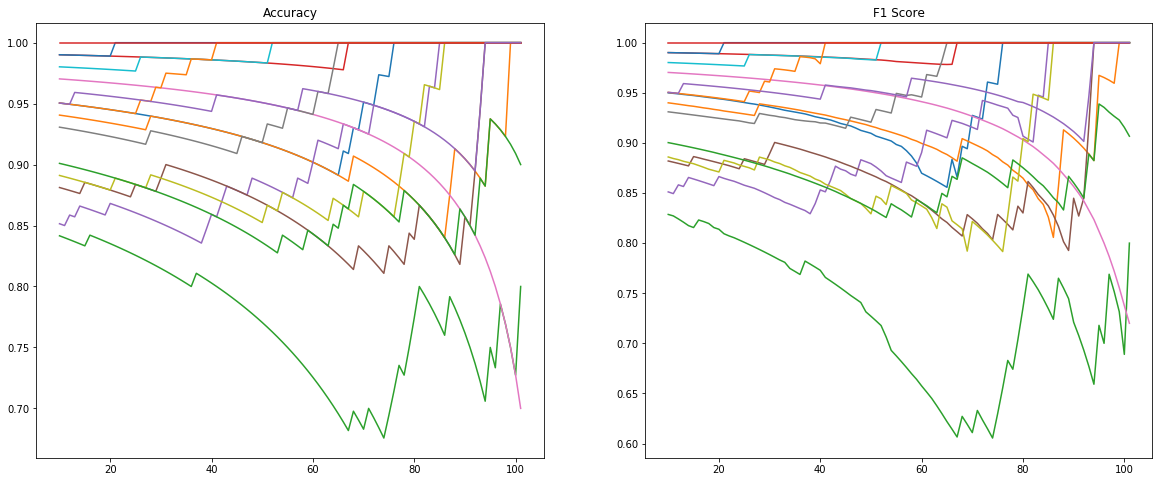

In [14]:
plot_metrics_by_quantile_several_executions(metrics_by_dispersion_quantile=epd.get_metrics_by_dispersion_quantile())

In [15]:
prediction_dist_estimators = epd.get_prediction_distribution_estimators()

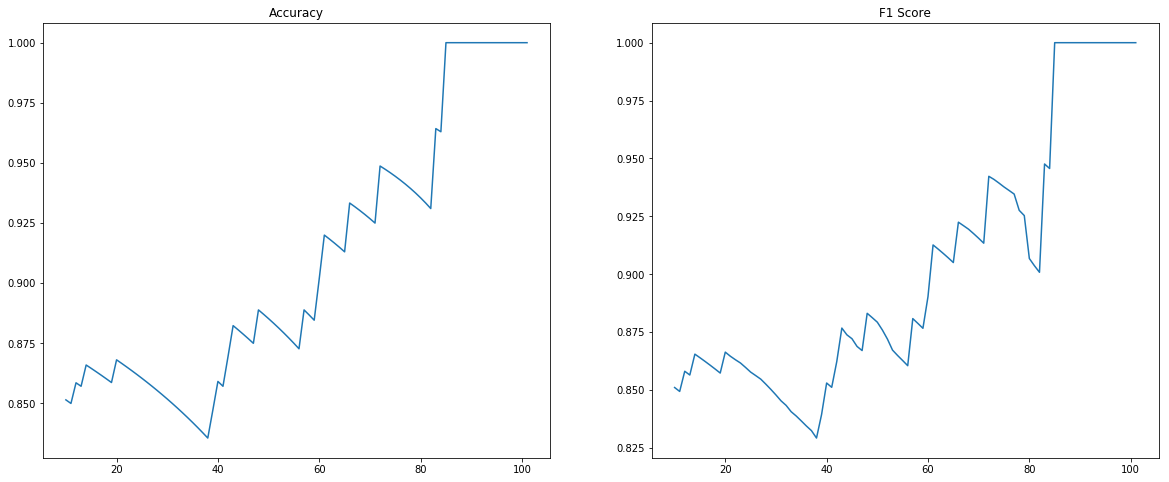

In [16]:
best_execution = data.loc[data['is_bayesian']==True].sort_values(['f1'], ascending=True).head(1).squeeze()['execution_id']
estimator = prediction_dist_estimators[best_execution]
plot_metrics_by_quantile(metrics_by_quantile=estimator.metrics_by_quantile)

True -> 2
Predicted -> 2
STDS: 0.0014685394708067179


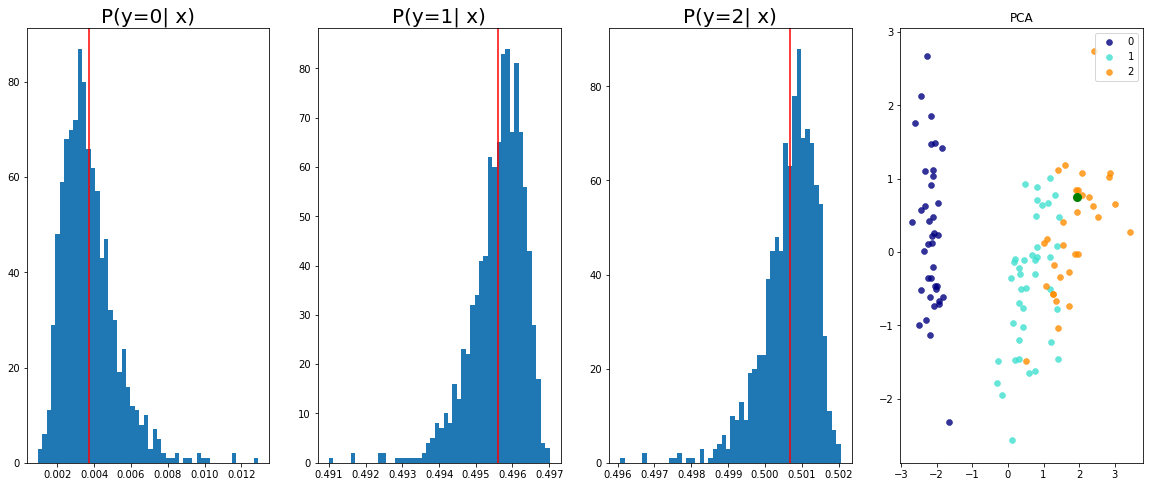

In [18]:
plot_prediction_probabilities(estimator=estimator, index_to_plot=1)

True -> 2
Predicted -> 2
STDS: 0.0014685394708067179


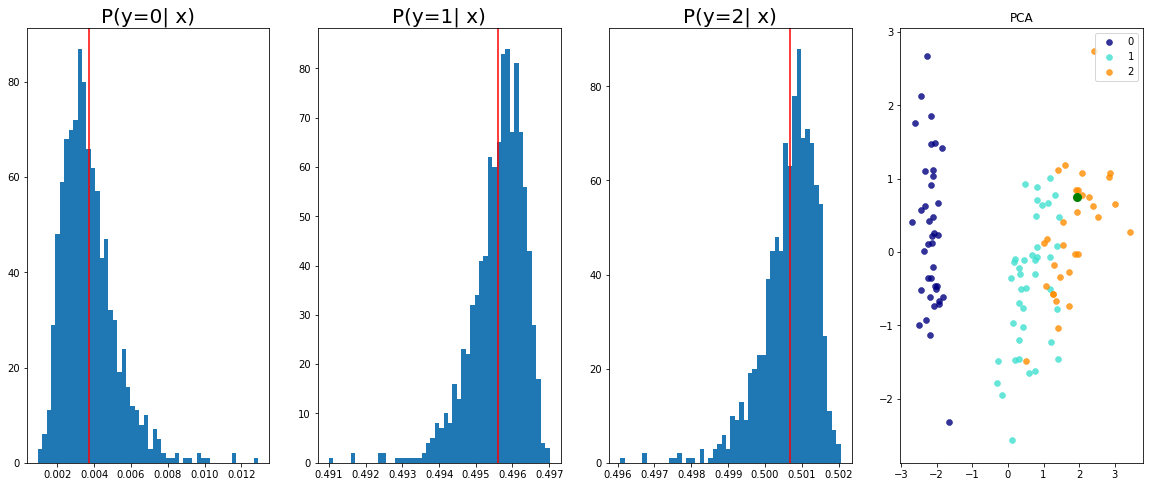

In [19]:
plot_prediction_probabilities(estimator=estimator, index_to_plot=1)

True -> 1
Predicted -> 1
STDS: 0.014180472120642662


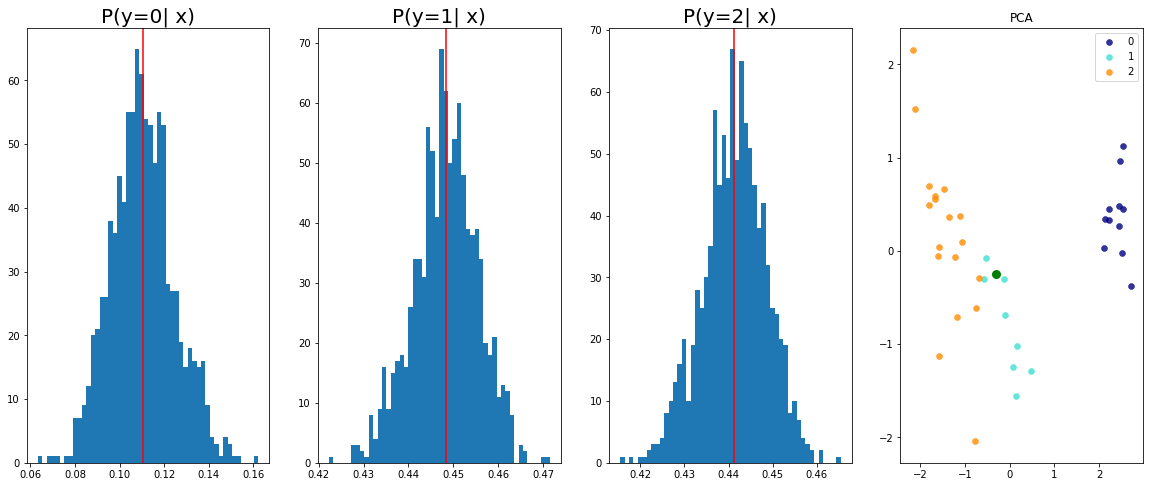

True -> 0
Predicted -> 0
STDS: 0.0032596320379525423


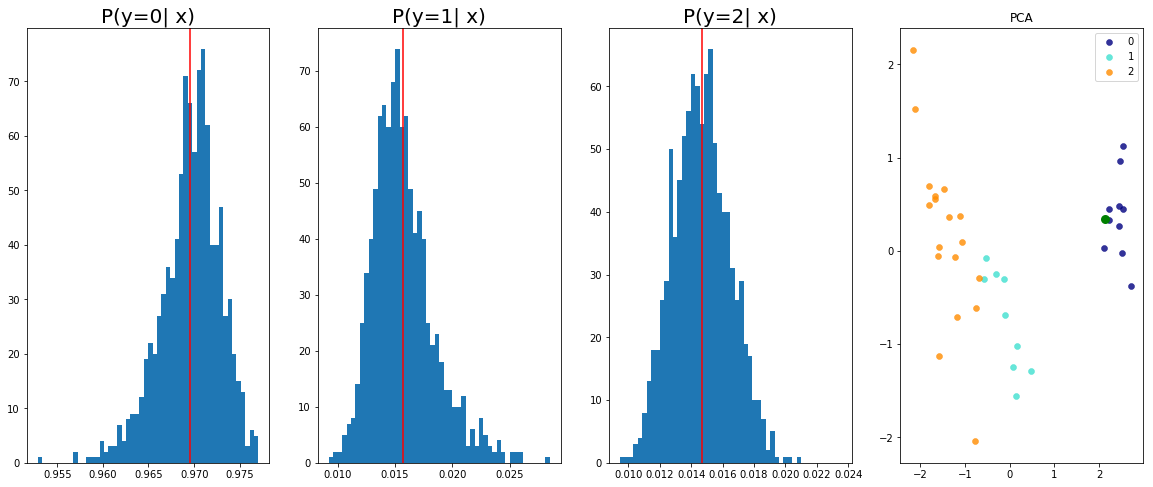

True -> 2
Predicted -> 2
STDS: 0.020435117185115814


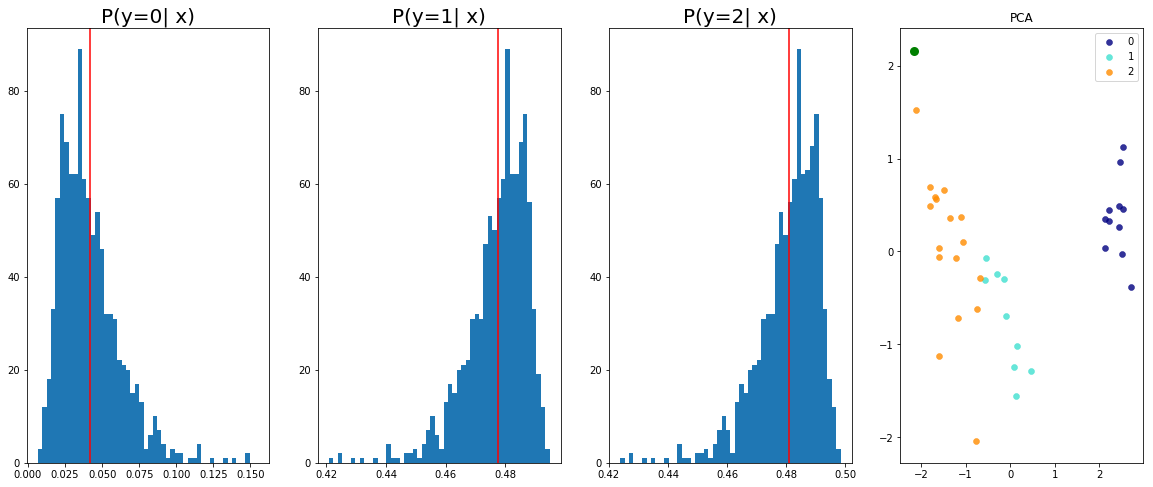

True -> 2
Predicted -> 2
STDS: 0.00468433927744627


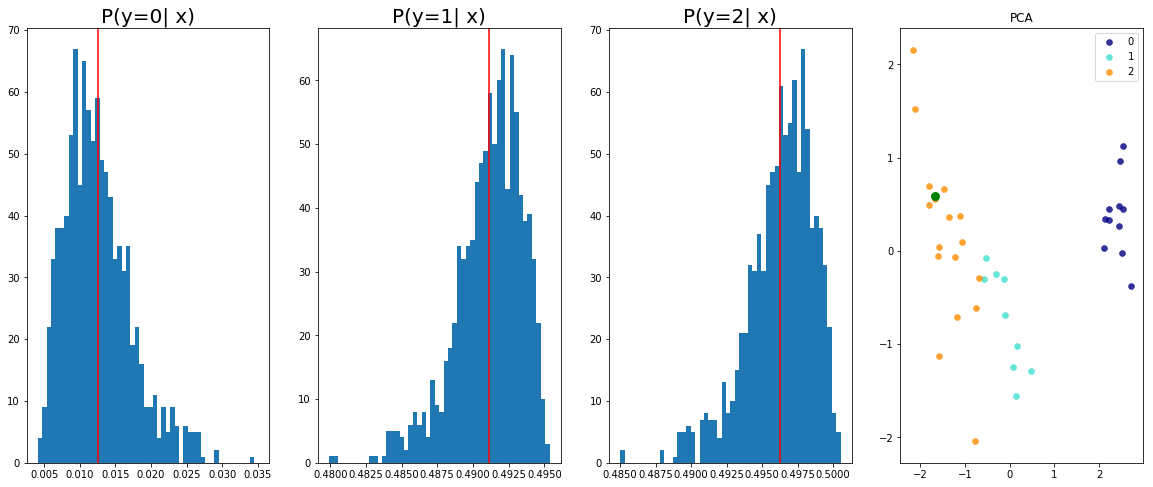

True -> 2
Predicted -> 1
STDS: 0.0002991895016748458


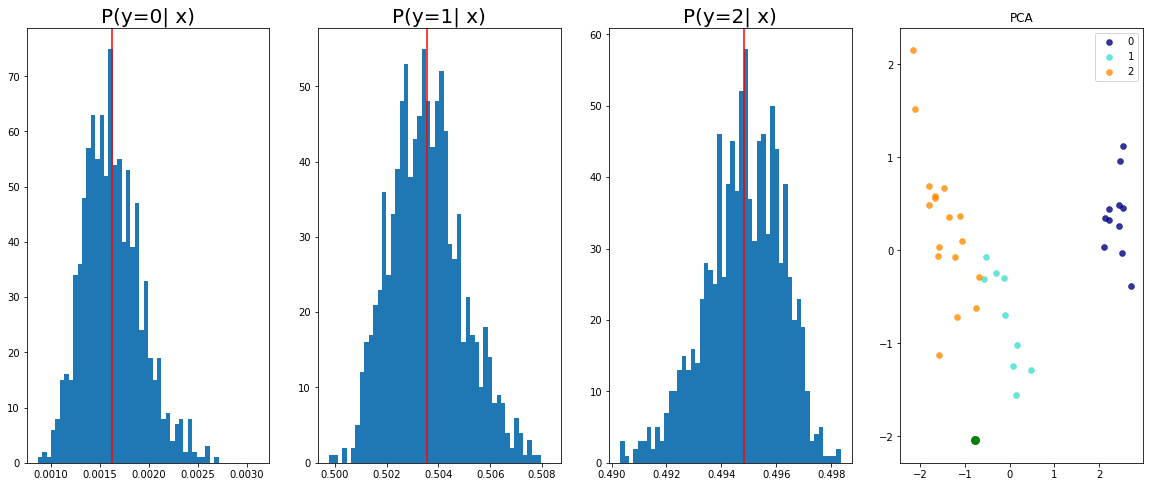

True -> 2
Predicted -> 2
STDS: 0.017707563936710358


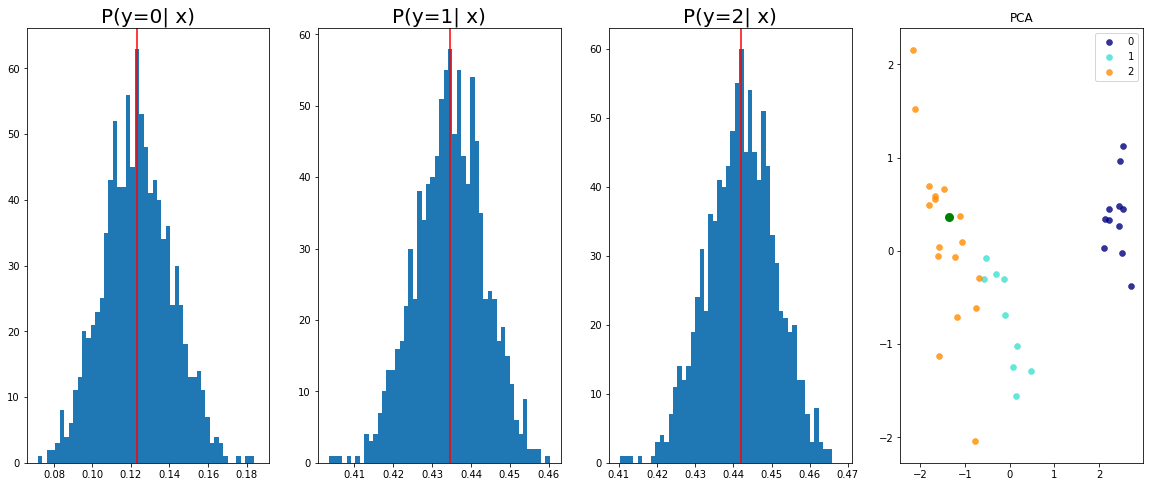

True -> 1
Predicted -> 1
STDS: 0.009530093520879745


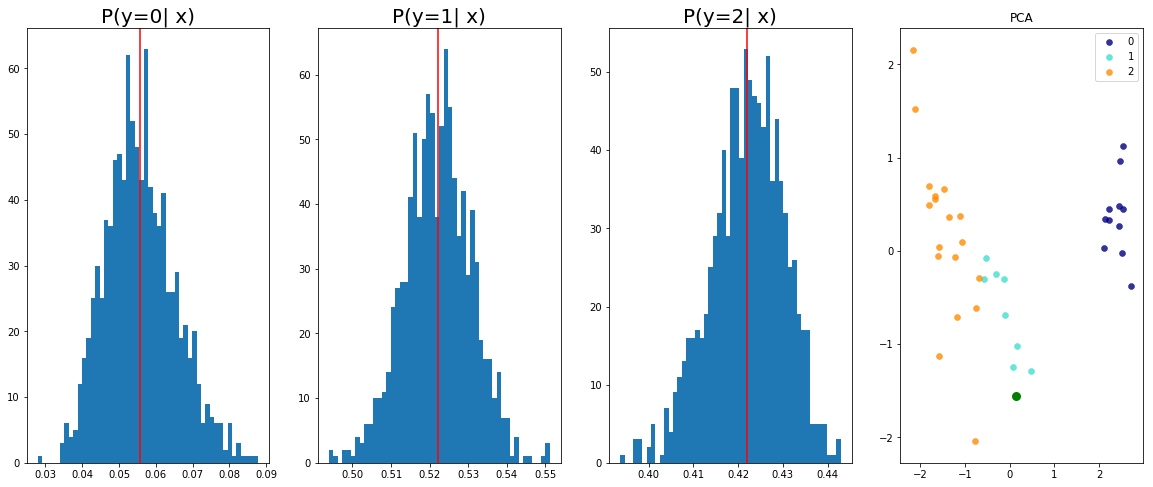

True -> 0
Predicted -> 0
STDS: 0.0009649691637605429


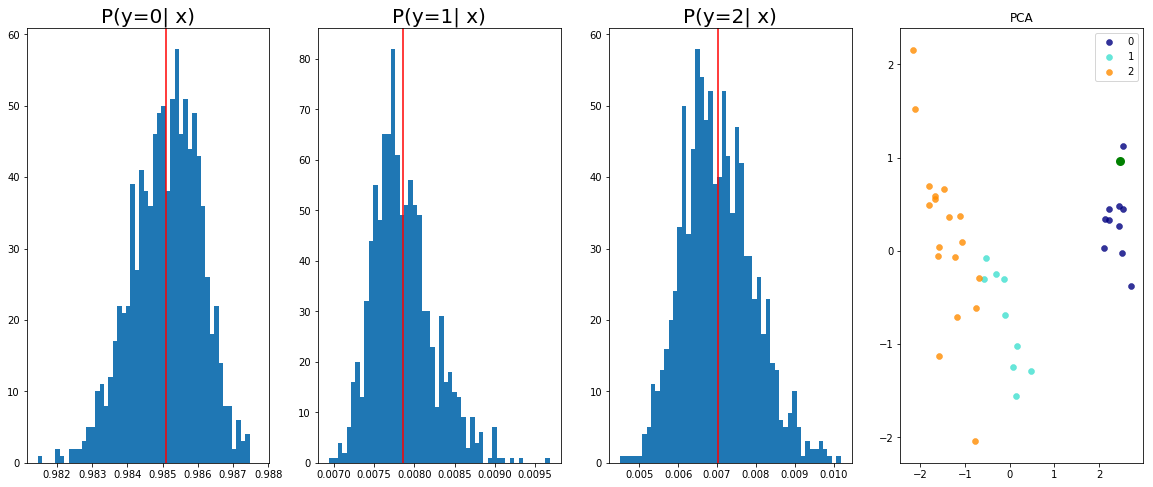

True -> 2
Predicted -> 2
STDS: 0.011811153031885624


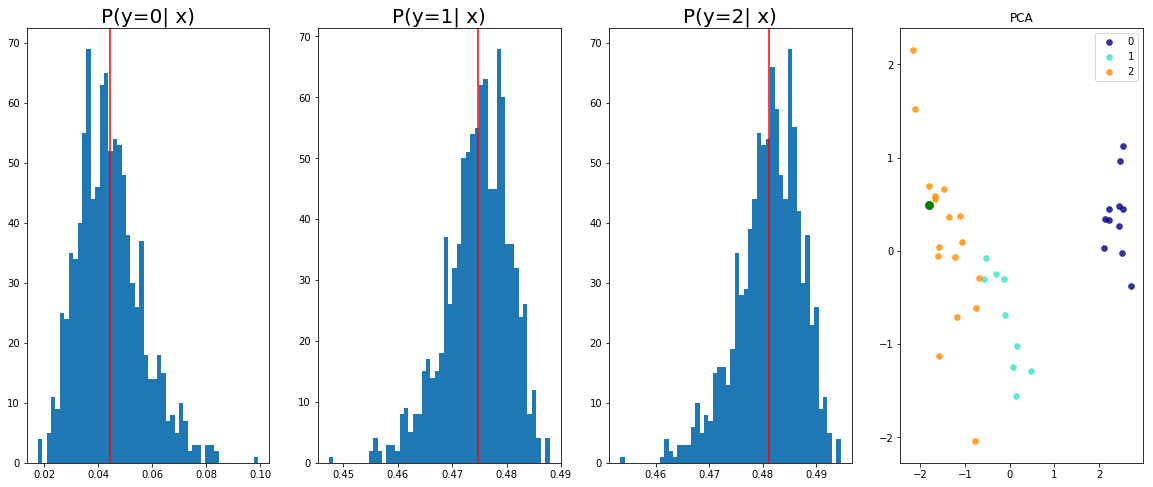

True -> 2
Predicted -> 2
STDS: 0.008062107488512993


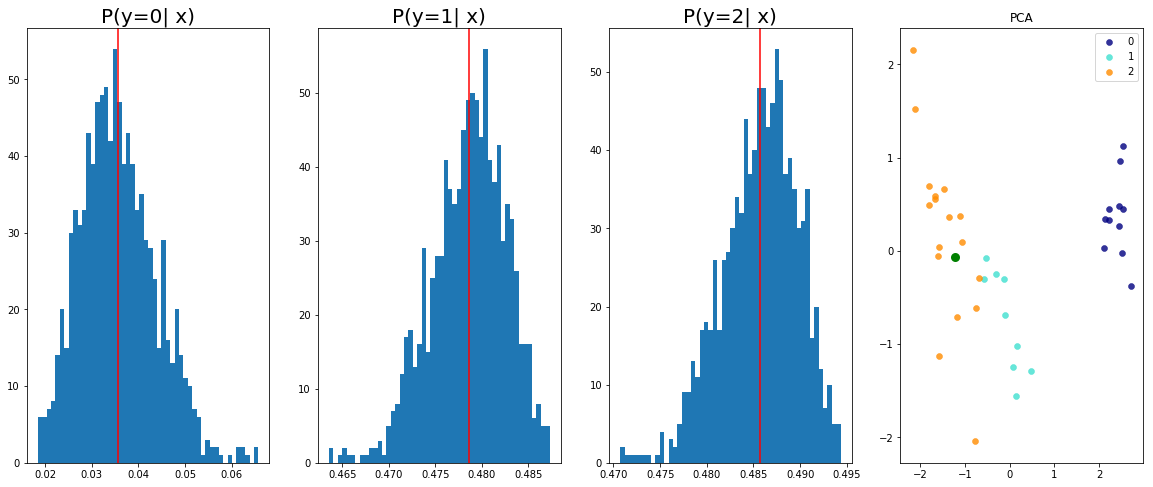

True -> 2
Predicted -> 2
STDS: 0.019335374236106873


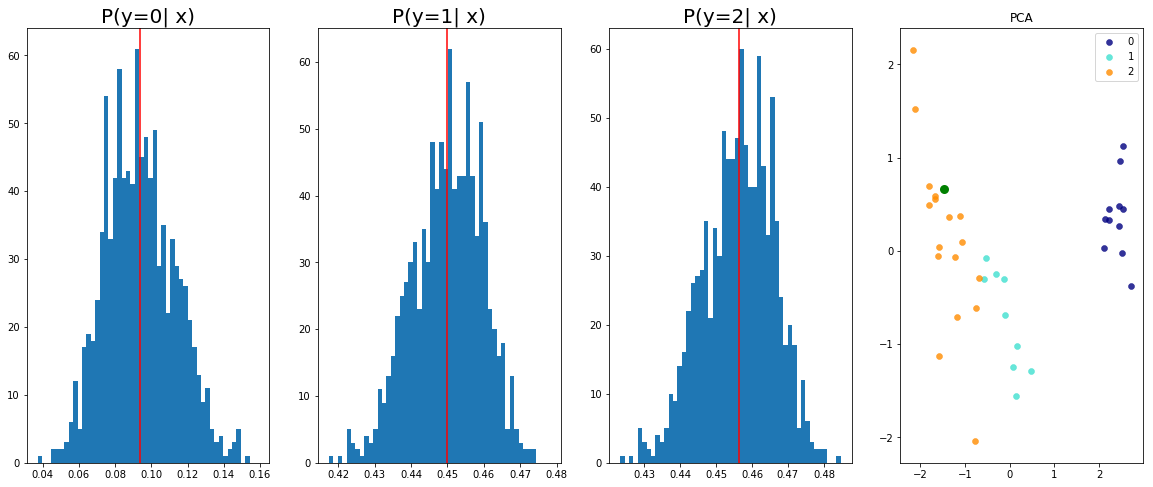

True -> 1
Predicted -> 2
STDS: 0.003835488110780716


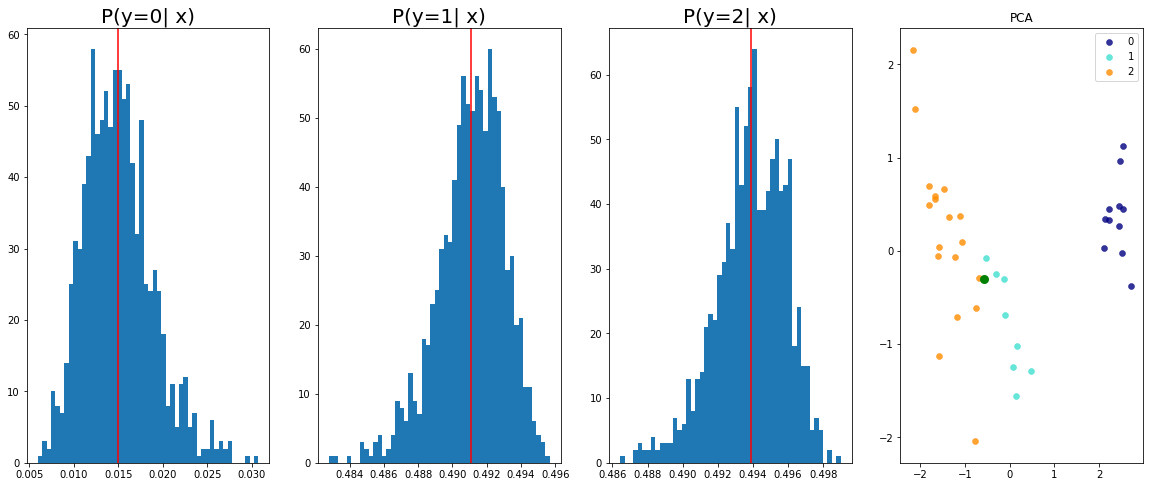

True -> 1
Predicted -> 1
STDS: 0.009024953469634056


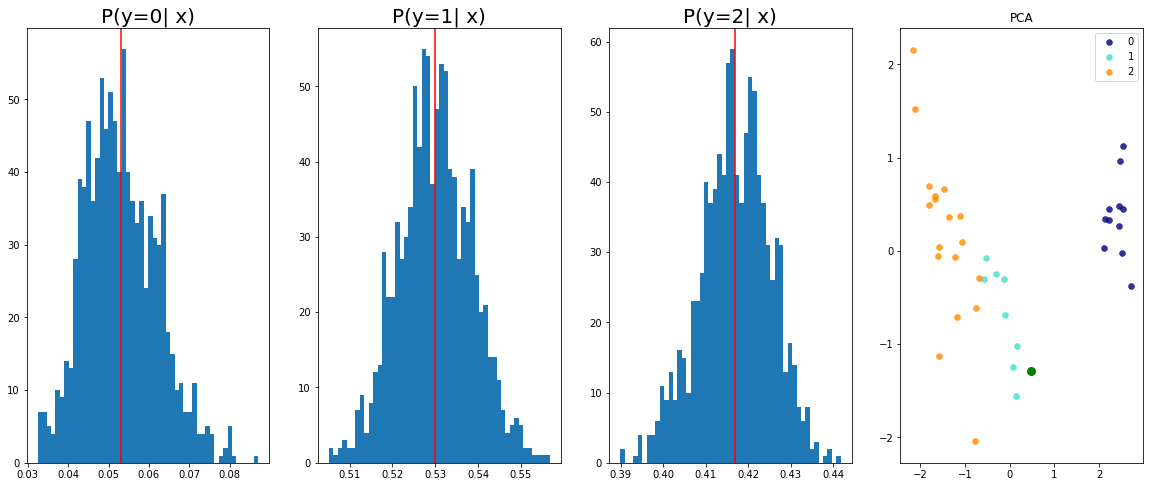

True -> 0
Predicted -> 0
STDS: 0.0004527660785242915


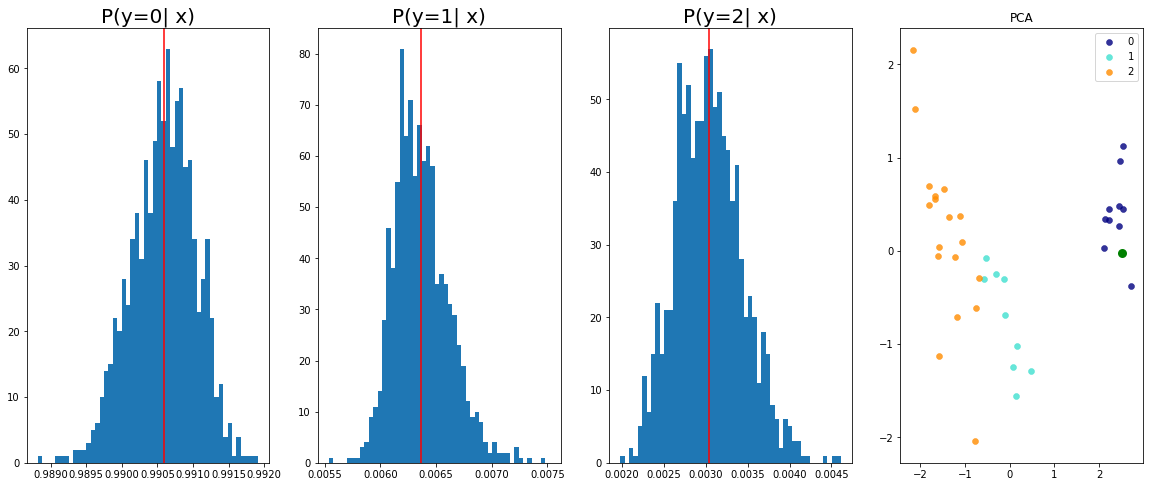

True -> 0
Predicted -> 0
STDS: 0.03202137351036072


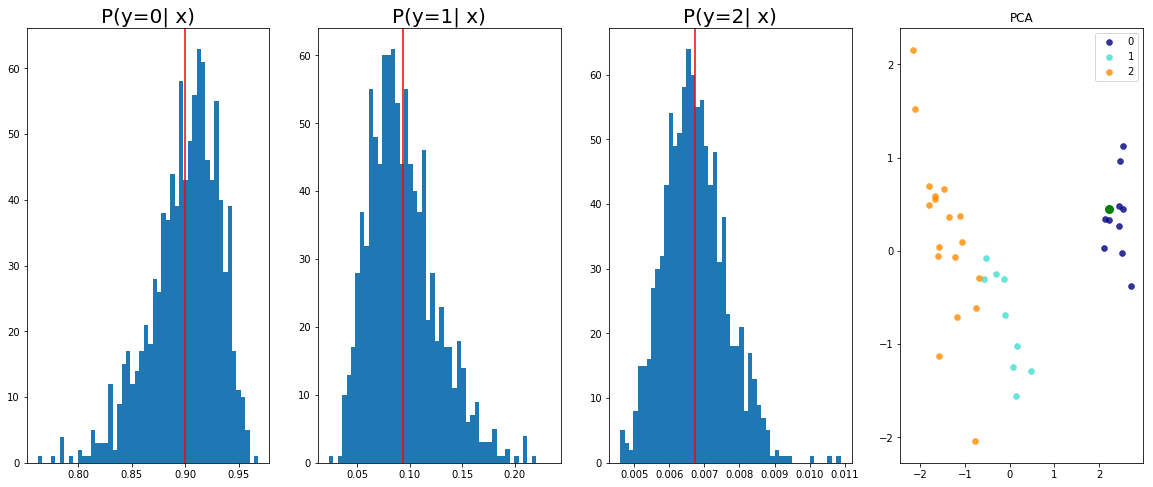

True -> 0
Predicted -> 0
STDS: 0.015608832240104675


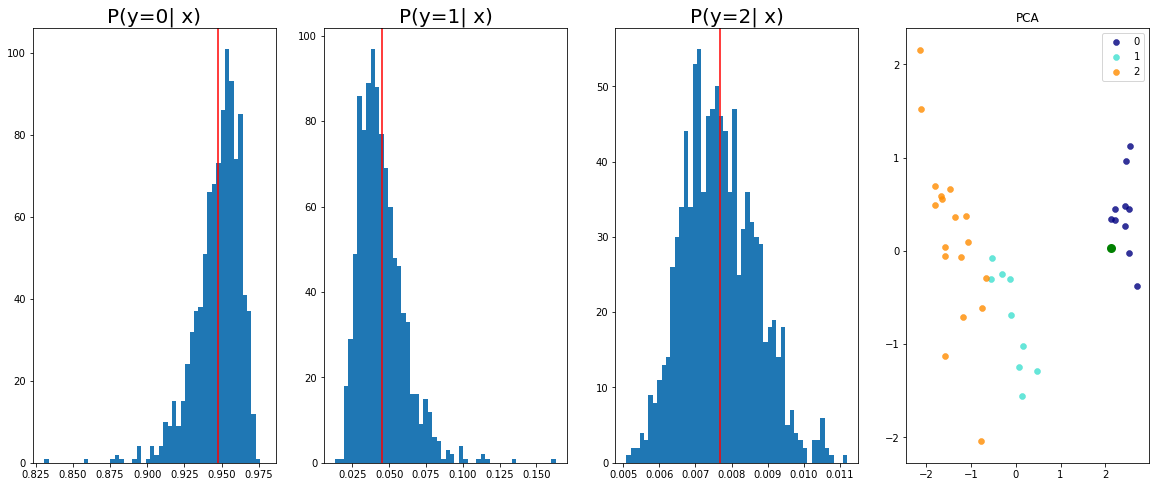

True -> 2
Predicted -> 2
STDS: 0.025825634598731995


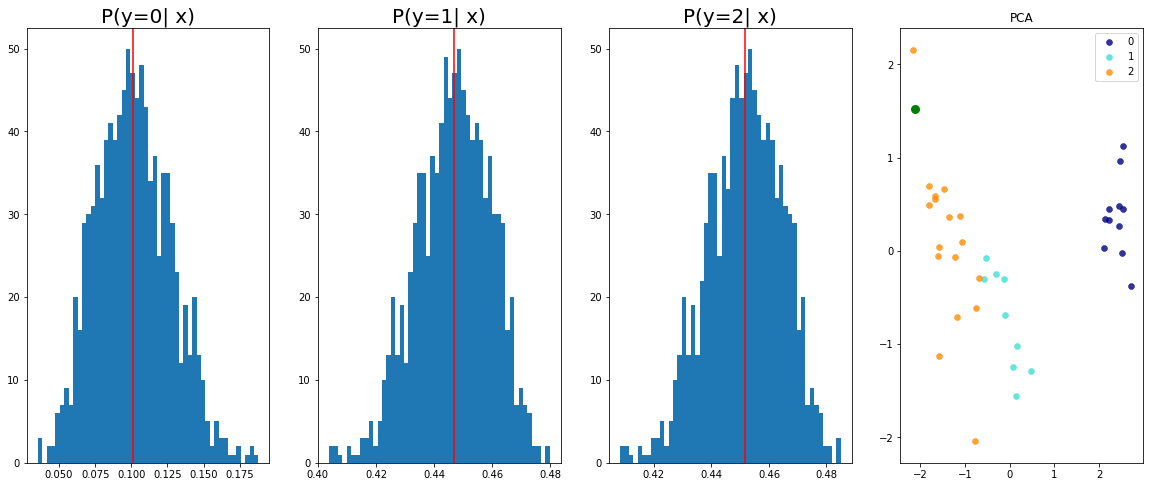

True -> 1
Predicted -> 1
STDS: 0.00637085223570466


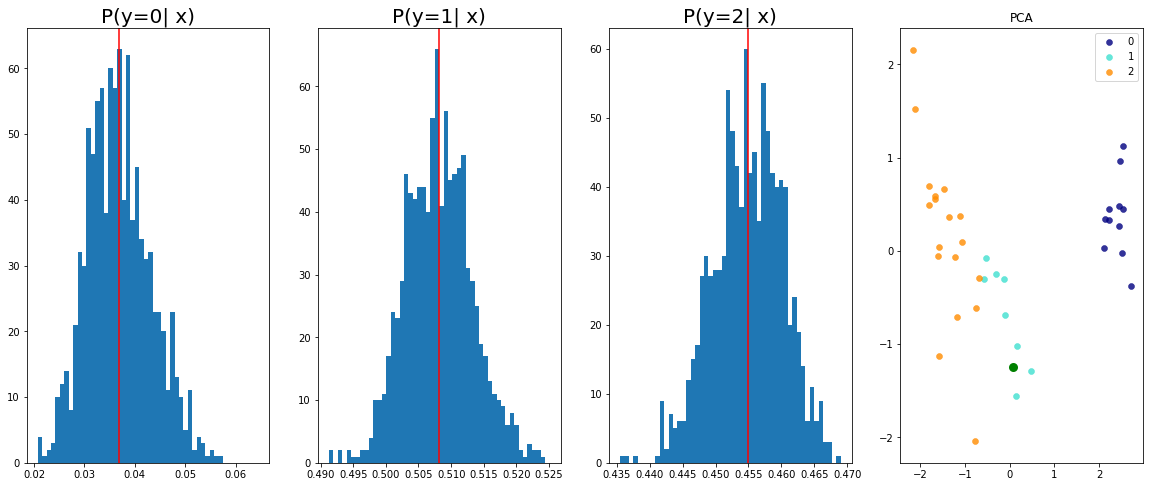

True -> 0
Predicted -> 0
STDS: 0.0013822091277688742


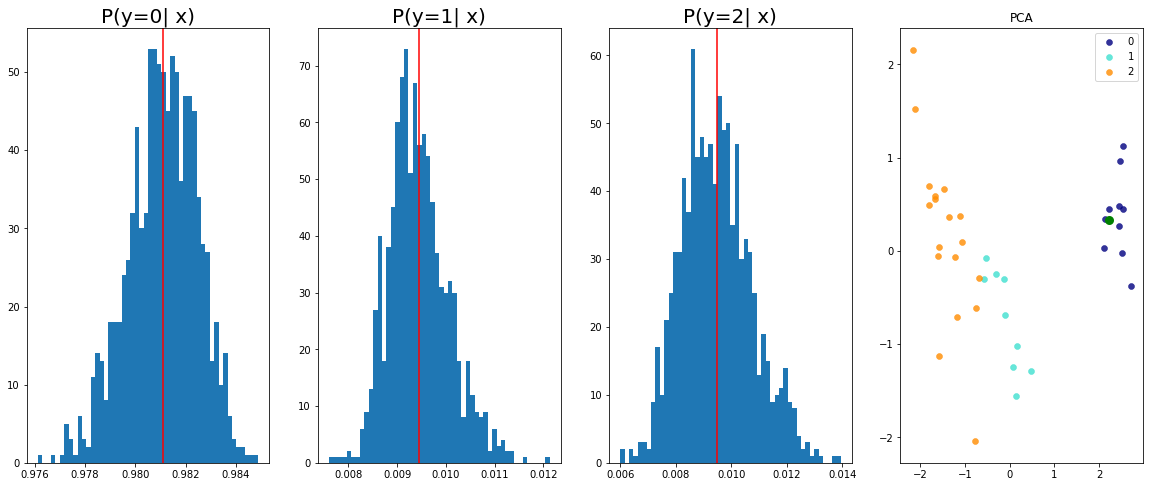

True -> 2
Predicted -> 2
STDS: 0.007773192599415779


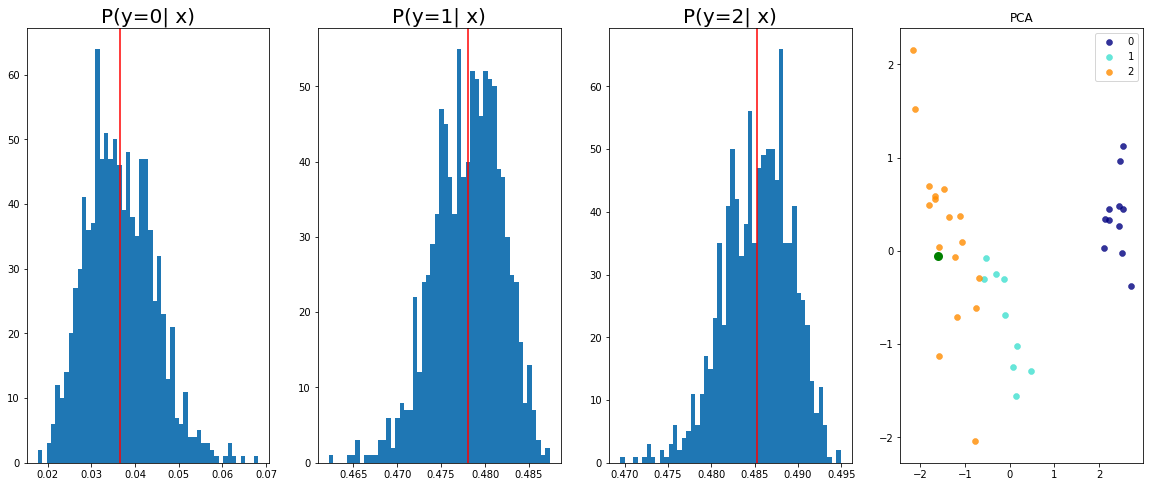

True -> 1
Predicted -> 2
STDS: 0.006307635456323624


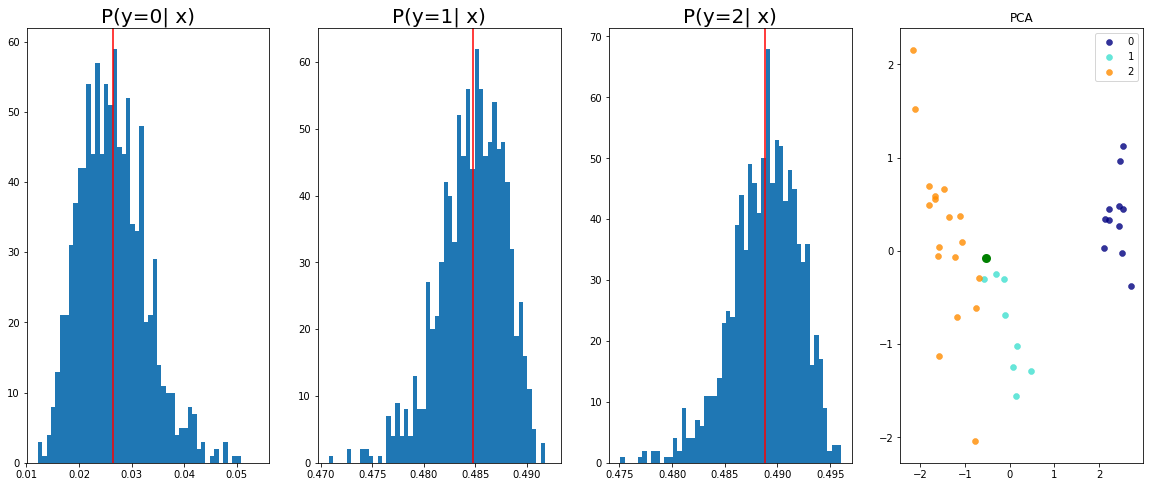

True -> 2
Predicted -> 2
STDS: 0.014062246307730675


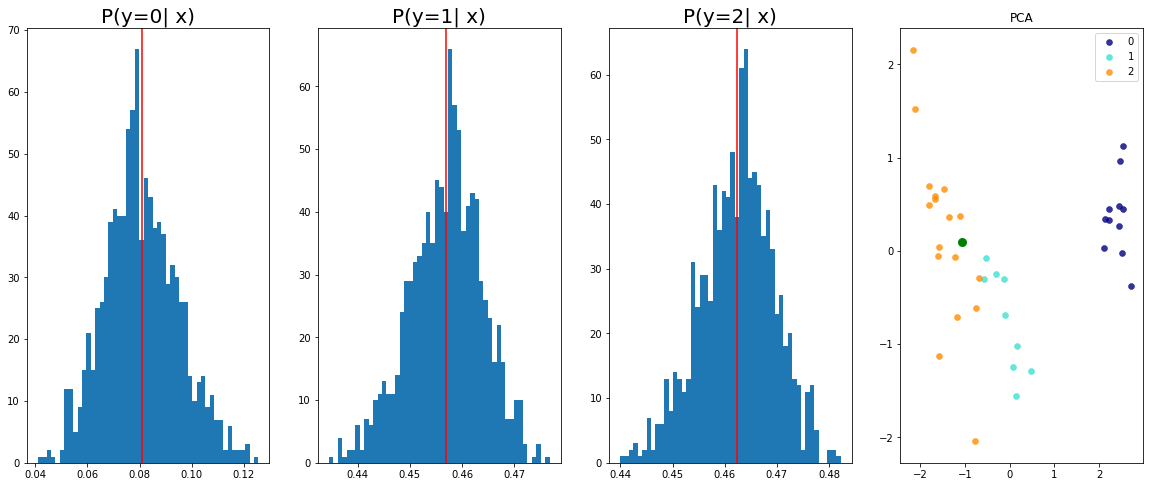

True -> 2
Predicted -> 2
STDS: 0.013031214475631714


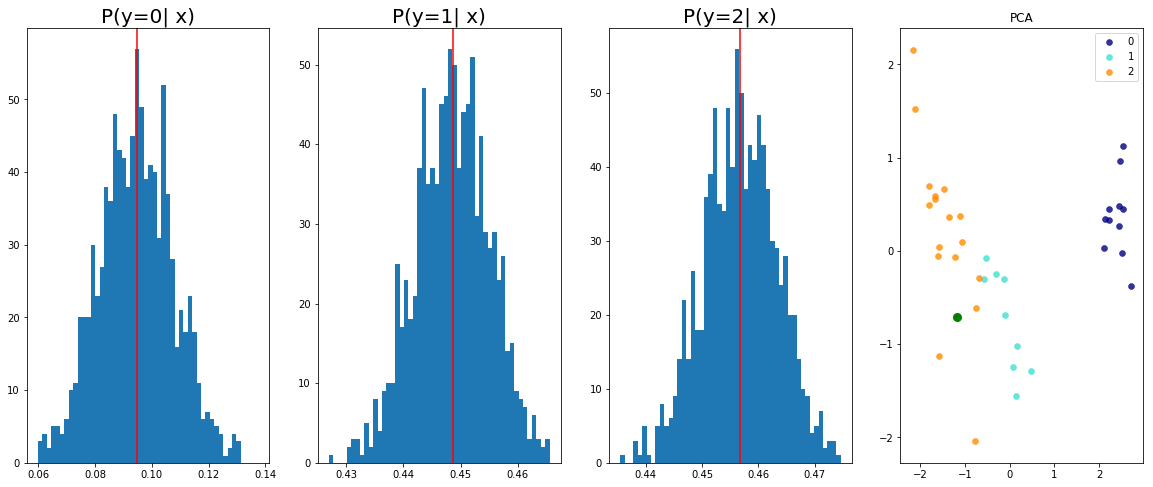

True -> 2
Predicted -> 2
STDS: 0.016981029883027077


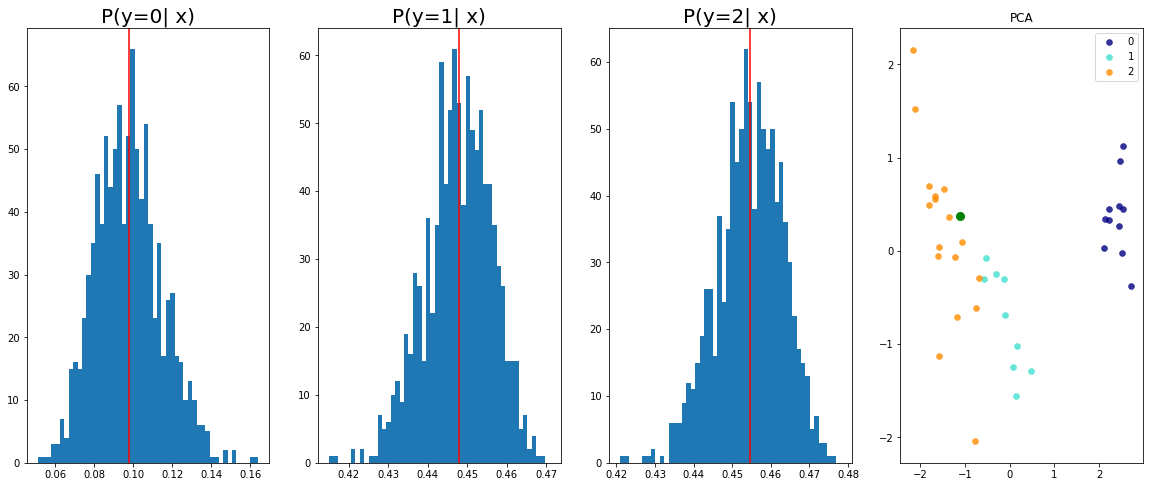

True -> 1
Predicted -> 1
STDS: 0.009823072701692581


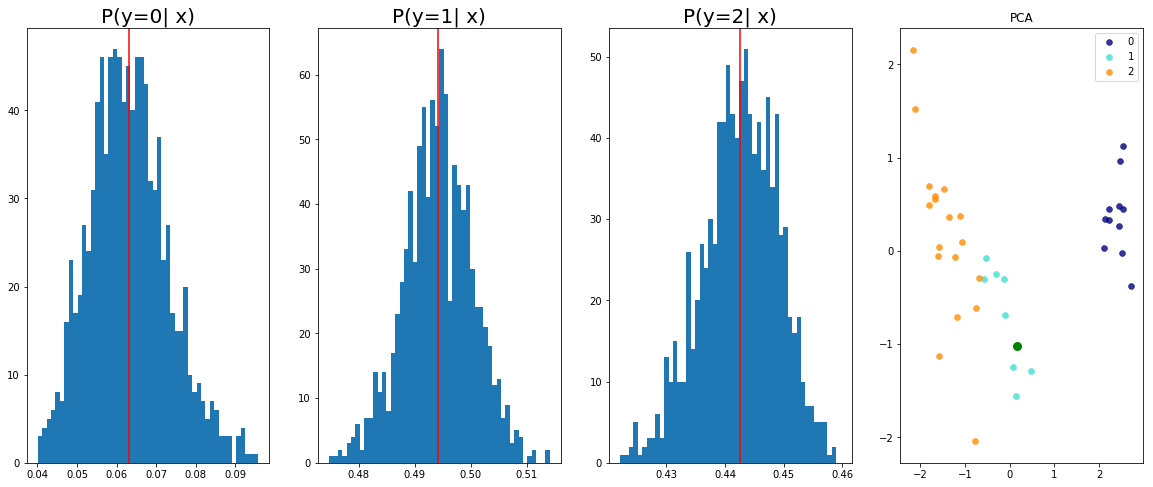

True -> 2
Predicted -> 2
STDS: 0.01885349676012993


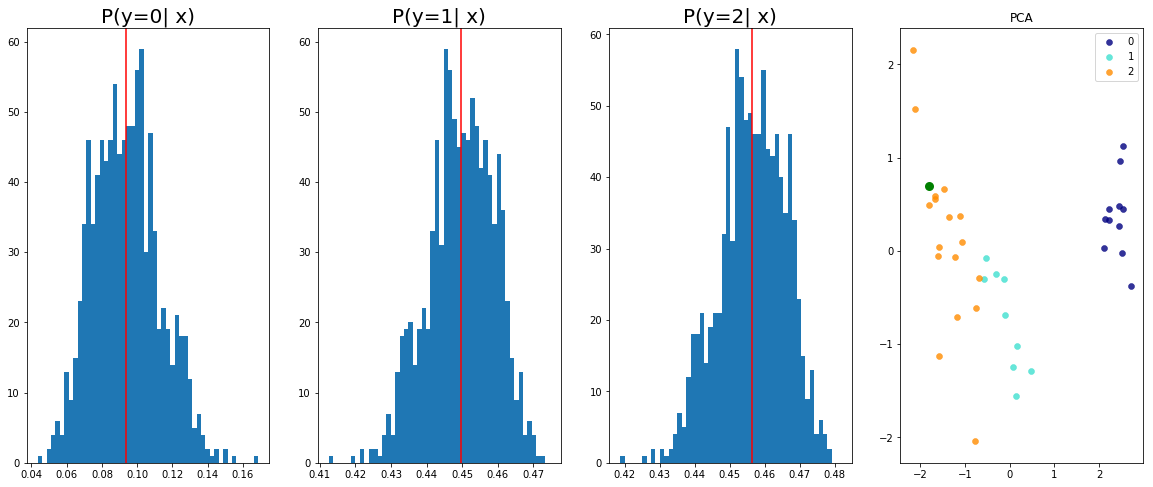

True -> 1
Predicted -> 1
STDS: 0.015483238734304905


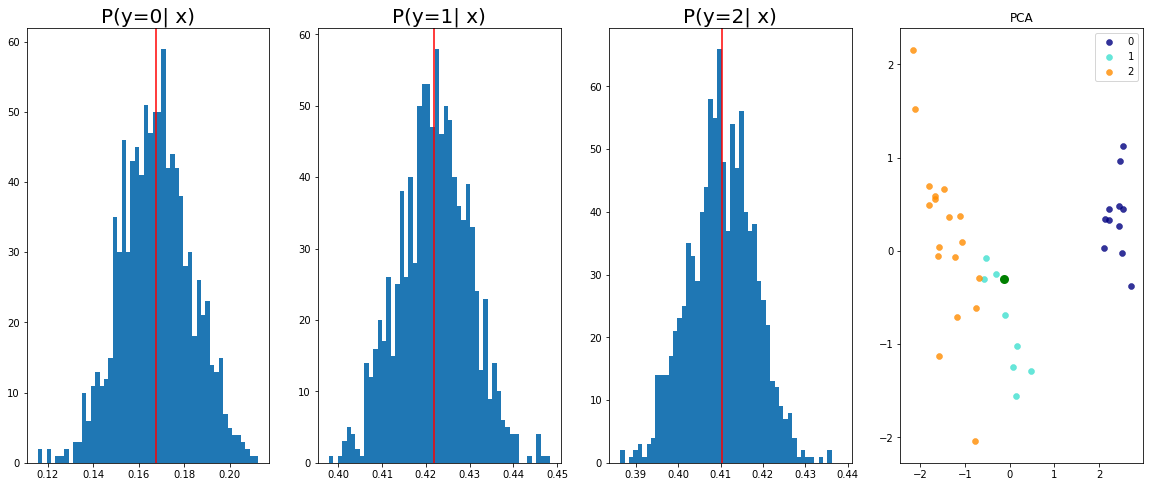

True -> 0
Predicted -> 0
STDS: 0.00023017451167106628


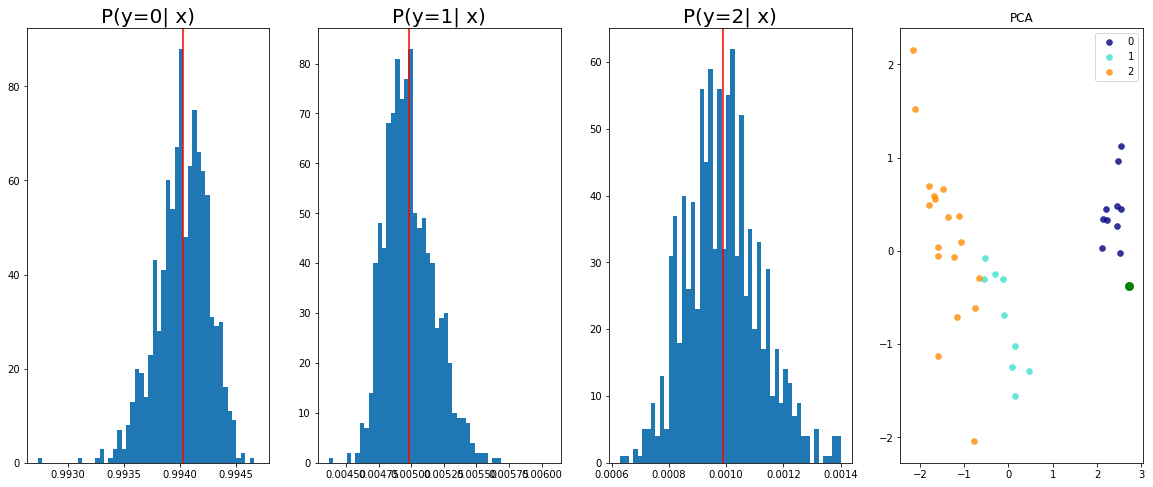

True -> 0
Predicted -> 0
STDS: 0.00074500881601125


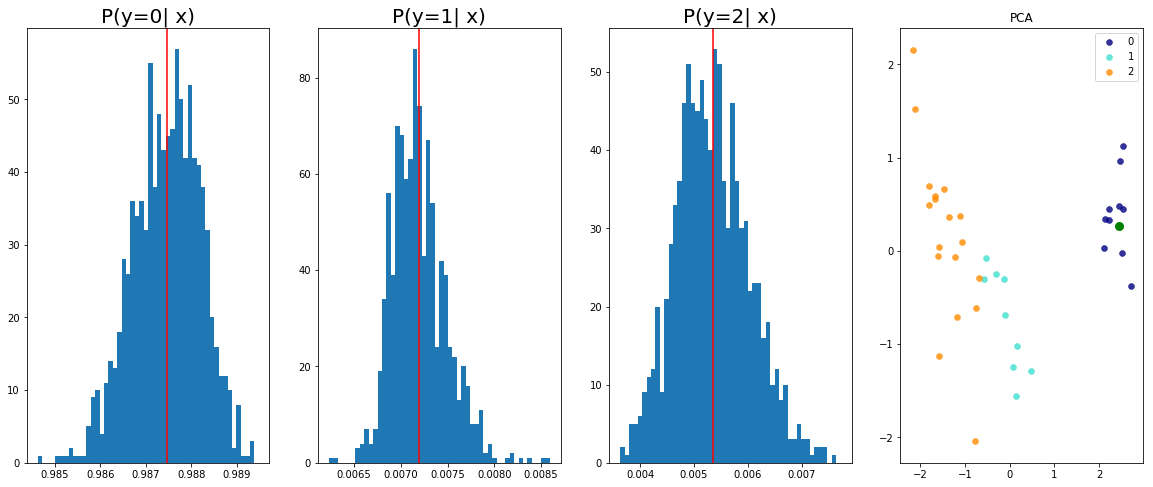

True -> 0
Predicted -> 0
STDS: 0.0005686994409188628


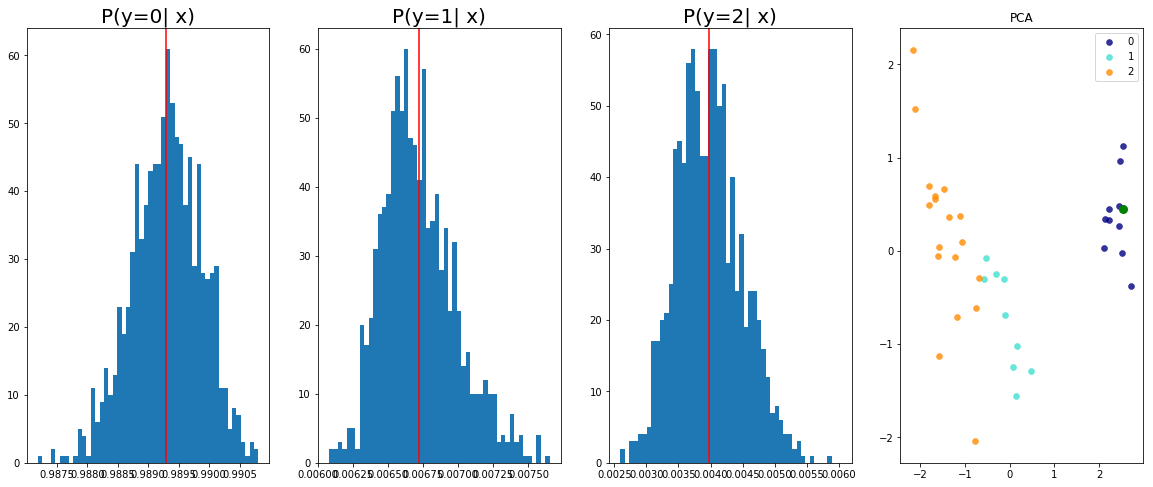

True -> 0
Predicted -> 0
STDS: 0.0007598111405968666


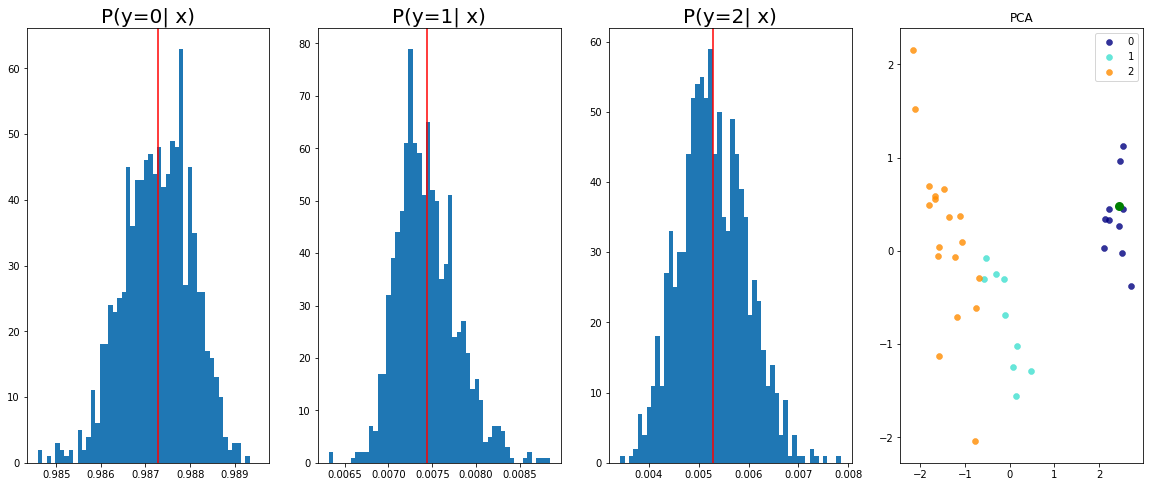

True -> 2
Predicted -> 2
STDS: 0.004470502026379108


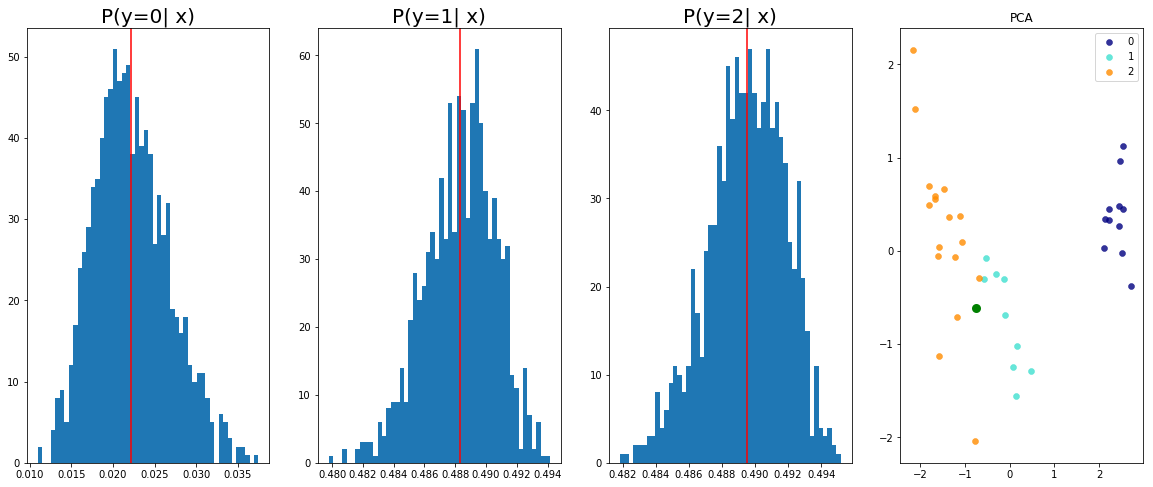

True -> 1
Predicted -> 1
STDS: 0.007290319073945284


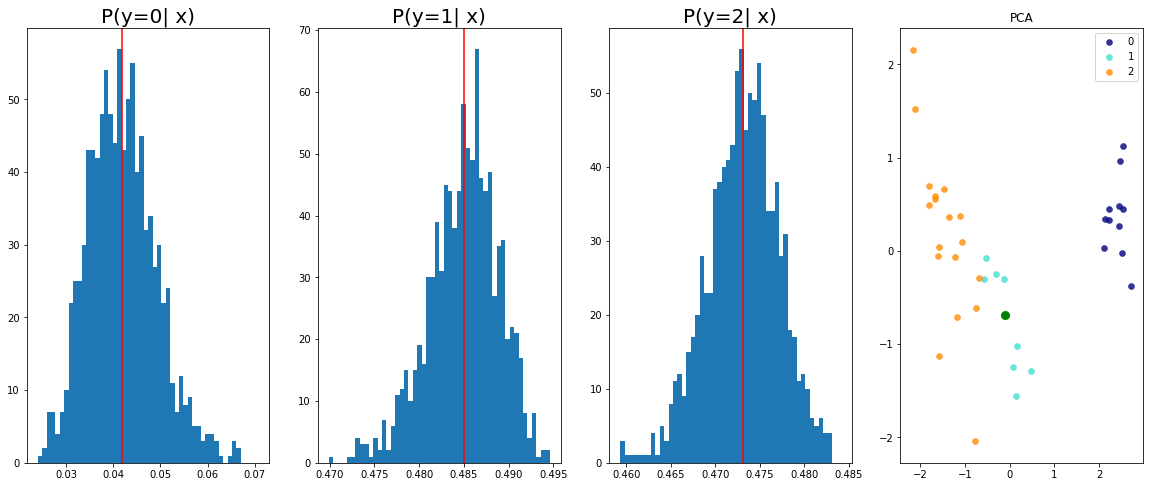

True -> 2
Predicted -> 1
STDS: 0.015486976131796837


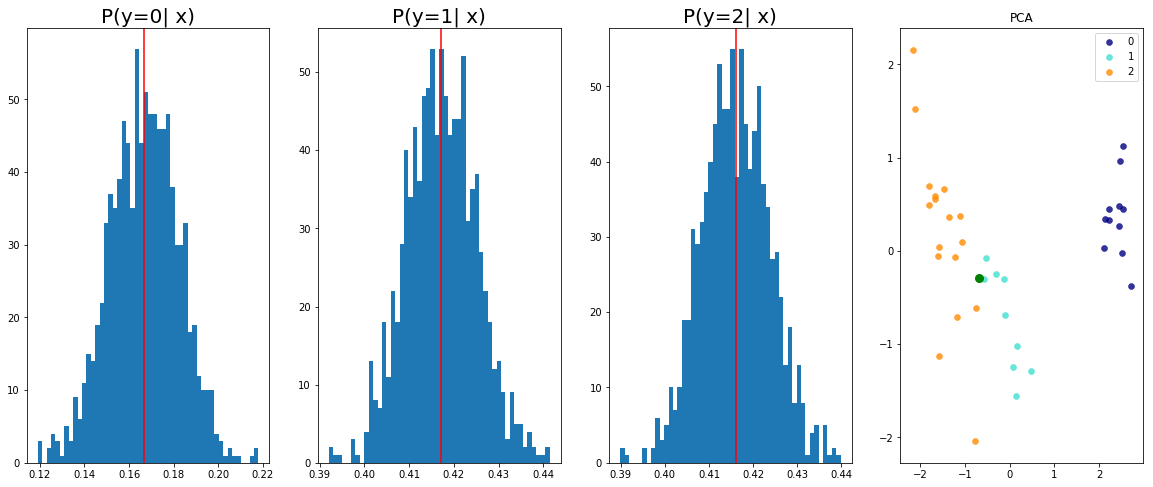

True -> 2
Predicted -> 2
STDS: 0.016842419281601906


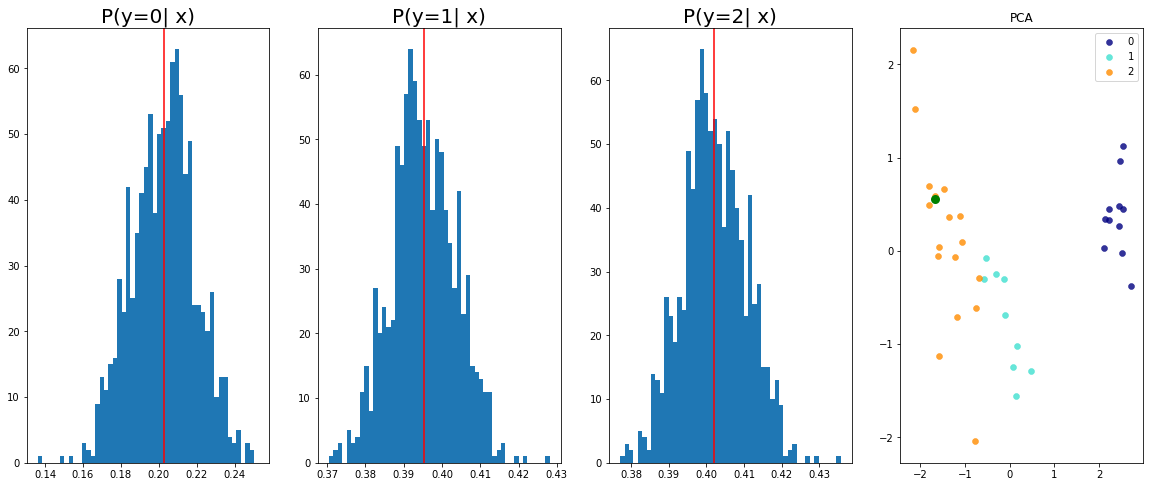

True -> 2
Predicted -> 2
STDS: 0.003930853679776192


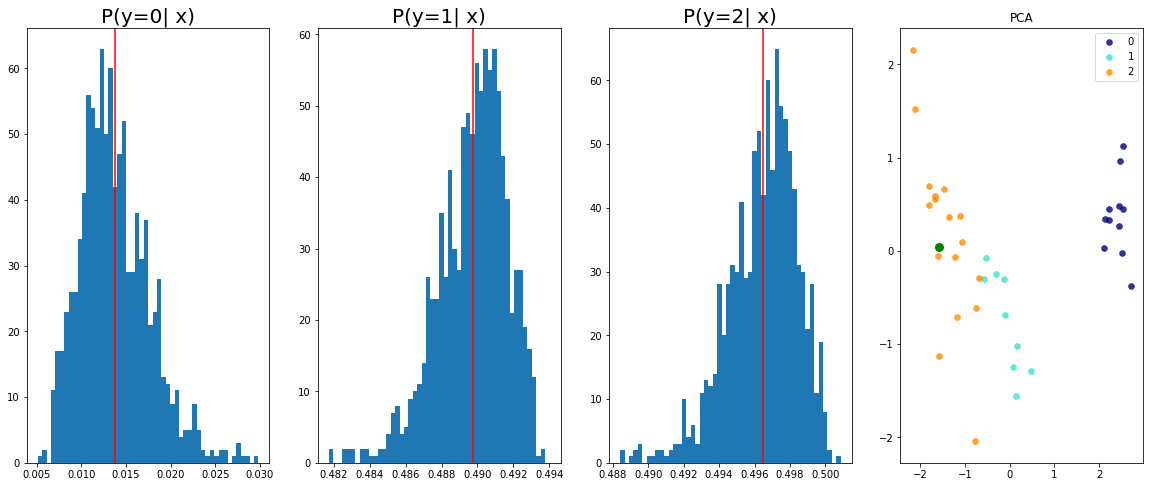

True -> 2
Predicted -> 2
STDS: 0.0002609115617815405


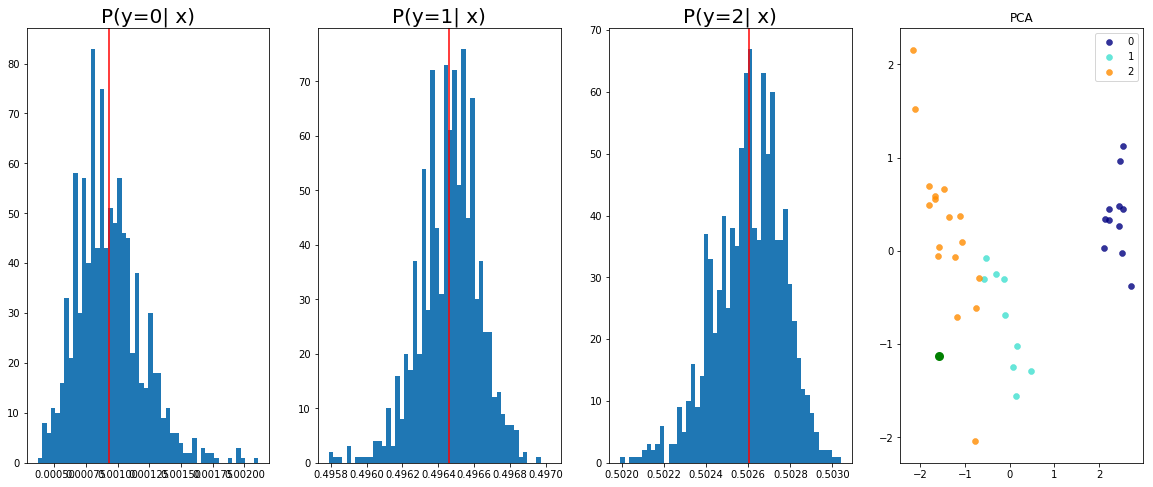

True -> 0
Predicted -> 0
STDS: 0.0009941925527527928


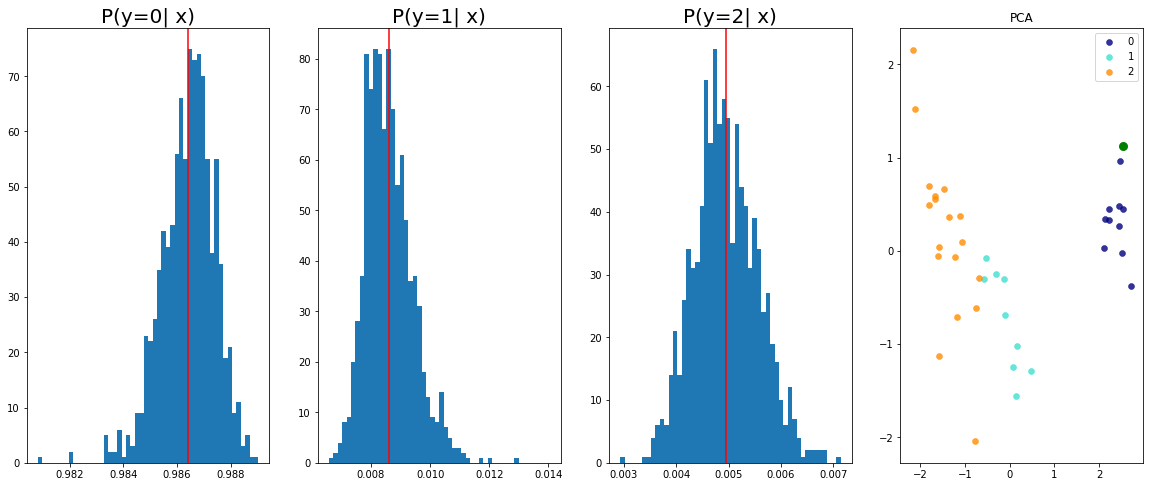

In [21]:
for i in range(len(estimator)):
    plot_prediction_probabilities(estimator=estimator, index_to_plot=i)